In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import tensorflow as tf
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

C:\Users\Quezada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Quezada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\art\estimators\certification\__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [6]:
DATA_DIR = 'data'

In [7]:

# Cargar el modelo local
model = tf.keras.models.load_model('./oModel')

In [8]:
# Crear el clasificador de ART a partir del modelo local
classifier = TensorFlowV2Classifier(model=model, nb_classes=10, input_shape=(64, 64, 3))


Found 9339 images belonging to 25 classes.


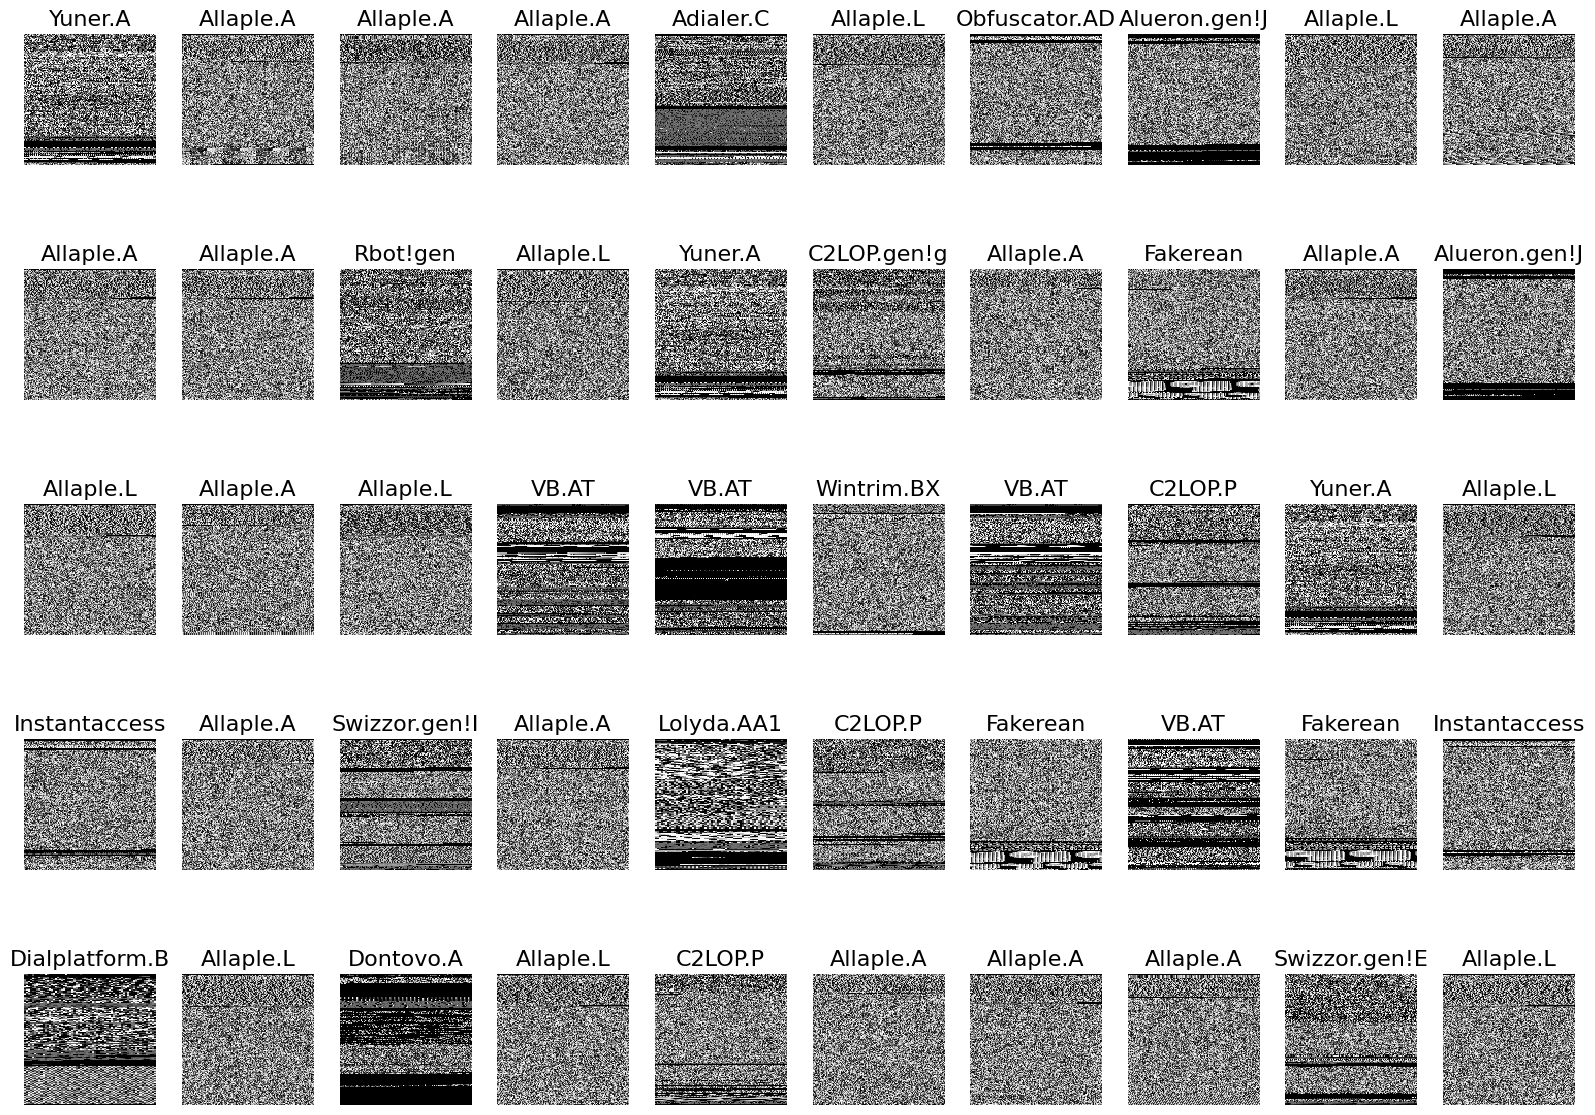

In [9]:
datagen = ImageDataGenerator().flow_from_directory(directory = DATA_DIR, target_size = (128, 128), batch_size=10000) 

images, label = next(datagen)

if type(images[0]) is np.ndarray:
    images = np.array(images).astype(np.uint8)
    
    if (images.shape[-1] != 3):
        images = images.transpose((0,2,3,1))

f = plt.figure(figsize=(20, 30))

cols = 10 

for i in range(0,50):
    sp = f.add_subplot(10, cols, i+1)
    sp.axis('Off')

    if label is not None:
        sp.set_title(list(datagen.class_indices.keys())[np.argmax(label[i])], fontsize=16)

    plt.imshow(images[i], interpolation=None if False else 'none')

In [10]:
# Cargar los datos de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images / 255., label, test_size = 0.3)

print("X_train --> ", X_train.shape)
print("y_train --> ", y_train.shape)
print("X_test --> ", X_test.shape)
print("y_test--> ", y_test.shape)


X_train -->  (6537, 128, 128, 3)
y_train -->  (6537, 25)
X_test -->  (2802, 128, 128, 3)
y_test-->  (2802, 25)


In [12]:
# Preprocesar los datos
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [15]:
# Definir el ataque
attack = FastGradientMethod(estimator=classifier, eps=0.1)
loss_object = tf.keras.losses.MeanSquaredError()

In [16]:

# Generar ejemplos adversariales
x_test_adv = attack.generate(x=X_test)

TypeError: The loss function `loss_object` is required for computing loss gradients, but it has not been defined.

In [ ]:

# Evaluar la precisión del modelo en los ejemplos adversariales
predictions = np.argmax(classifier.predict(x_test_adv), axis=1)
accuracy = np.sum(predictions == np.argmax(y_test, axis=1)) / len(y_test)
print(f"Precisión del modelo en ejemplos adversariales: {accuracy}")